In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import csv
import scipy.stats as st
import seaborn as sns
import numpy as np

In [3]:
# Specify the file path
file_path = '../data/cleaned/generic_butcher_cleaned.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
display(df)

,product_name,date_time,measured_weight,measured_height
0,13 oz Ribeye Tail A,2024-06-03 07:16:28,16.76,1.62952
1,13 oz Ribeye Tail A,2024-06-03 07:16:47,16.12,1.02086
2,16 oz Ribeye Tail A,2024-06-03 07:17:36,16.34,1.03975
3,16 oz Ribeye Tail A,2024-06-03 07:17:53,16.16,1.05378
4,16 oz Ribeye Tail A,2024-06-03 07:18:08,16.12,1.03522
...,...,...,...,...
34351,7 oz S Sirloin A,2024-06-28 22:58:13,6.82,1.25516
34352,7 oz S Sirloin A,2024-06-28 22:58:23,6.86,1.29131
34353,7 oz S Sirloin A,2024-06-28 22:58:36,6.94,1.36985
34354,7 oz S Sirloin A,2024-06-28 22:59:01,6.80,1.32573


In [5]:
file_path2 = '../data/cleaned/generic_butcher_spec_cleaned.csv'

# Read the CSV file into a DataFrame
df2 = pd.read_csv(file_path2)

# Display the DataFrame
display(df2)

,product_name,weight_min,weight_max,thick_min,thick_max
0,10 oz Sirloin A,9.12,10.12,1.10,1.75
1,11 oz Sirloin B,10.08,11.08,1.10,1.75
2,11 oz Sirloin C,10.45,11.54,1.10,1.75
3,13 oz Ribeye Tail A,11.95,14.04,0.50,3.00
4,16 oz Strip A,14.45,17.54,0.50,3.00
5,16 oz Dry Age Ribeye A,14.95,17.04,0.95,3.00
6,16 oz Prime Strip A,14.95,17.04,0.95,3.00
7,16 oz Ribeye Tail A,14.95,17.04,0.50,3.00
8,18 oz Ribeye A,15.95,20.04,0.75,1.75
9,20 oz Prime Ribeye A,18.95,21.10,0.95,2.00


In [8]:
#separate 1 product from remainder 
#find stdev, mean, max, and min throw into chart (will serve this with the histgram)
#determine bin widths
#determine max/ min of x axis (dynamic)
#min/max of y axis (dynamic)
#create variables of mean and the specs to throw vertical lines to the x-axis
    #this means merging tables###
#find outliers

In [18]:
product = df.loc[df["product_name"] == "10 oz  Sirloin A"]

product

,product_name,date_time,measured_weight,measured_height
5036,10 oz Sirloin A,2024-06-05 21:05:07,9.74,1.47718
5037,10 oz Sirloin A,2024-06-05 21:05:13,9.82,1.33462
5038,10 oz Sirloin A,2024-06-05 21:05:18,9.48,1.70458
5039,10 oz Sirloin A,2024-06-05 21:05:24,9.70,1.30403
5040,10 oz Sirloin A,2024-06-05 21:05:30,9.72,1.52521
...,...,...,...,...
32704,10 oz Sirloin A,2024-06-27 19:20:56,9.20,1.30005
32705,10 oz Sirloin A,2024-06-27 19:24:29,9.24,1.53207
32706,10 oz Sirloin A,2024-06-27 19:24:35,9.26,1.34580
32707,10 oz Sirloin A,2024-06-27 19:24:50,9.18,1.44220


In [19]:
##do another loc here to get rid of IQR values 
product.describe()


,measured_weight,measured_height
count,695.000000,695.000000
mean,9.764863,1.378185
std,0.246151,0.123794
min,9.140000,1.056760
25%,9.600000,1.291290
50%,9.800000,1.360560
75%,9.980000,1.449585
max,11.000000,1.836880


In [20]:
product

,product_name,date_time,measured_weight,measured_height
5036,10 oz Sirloin A,2024-06-05 21:05:07,9.74,1.47718
5037,10 oz Sirloin A,2024-06-05 21:05:13,9.82,1.33462
5038,10 oz Sirloin A,2024-06-05 21:05:18,9.48,1.70458
5039,10 oz Sirloin A,2024-06-05 21:05:24,9.70,1.30403
5040,10 oz Sirloin A,2024-06-05 21:05:30,9.72,1.52521
...,...,...,...,...
32704,10 oz Sirloin A,2024-06-27 19:20:56,9.20,1.30005
32705,10 oz Sirloin A,2024-06-27 19:24:29,9.24,1.53207
32706,10 oz Sirloin A,2024-06-27 19:24:35,9.26,1.34580
32707,10 oz Sirloin A,2024-06-27 19:24:50,9.18,1.44220


In [21]:
product = product[["product_name","date_time","measured_weight"]]
product

,product_name,date_time,measured_weight
5036,10 oz Sirloin A,2024-06-05 21:05:07,9.74
5037,10 oz Sirloin A,2024-06-05 21:05:13,9.82
5038,10 oz Sirloin A,2024-06-05 21:05:18,9.48
5039,10 oz Sirloin A,2024-06-05 21:05:24,9.70
5040,10 oz Sirloin A,2024-06-05 21:05:30,9.72
...,...,...,...
32704,10 oz Sirloin A,2024-06-27 19:20:56,9.20
32705,10 oz Sirloin A,2024-06-27 19:24:29,9.24
32706,10 oz Sirloin A,2024-06-27 19:24:35,9.26
32707,10 oz Sirloin A,2024-06-27 19:24:50,9.18


In [22]:
min_wt = np.min(product['measured_weight'])
max_wt = np.max(product['measured_weight'])

# min = 7.38 oz #max 8.66
binmin = np.floor(min_wt)
binmax = np.ceil(max_wt)
binmax

num_bins = int((binmax-binmin)*(1/.25))

In [23]:
sir_8 = product['measured_weight'].value_counts()
sir_8


measured_weight
10.00    41
9.64     31
9.54     28
9.84     28
10.10    24
9.62     23
10.06    23
9.56     22
10.02    21
9.82     21
9.98     21
10.08    19
9.80     19
9.90     19
9.92     19
9.96     19
9.74     18
9.76     18
9.78     17
10.04    16
9.86     16
9.88     16
9.42     16
9.60     15
9.68     15
9.94     15
9.70     14
9.66     13
9.72     12
9.52     12
9.58     10
9.46     10
9.36     10
9.20      8
9.48      8
9.34      6
9.44      6
9.32      5
9.24      4
9.26      3
9.40      3
9.22      3
10.11     3
9.50      3
9.18      3
9.30      3
9.28      2
9.14      2
9.16      2
9.87      1
10.09     1
9.85      1
10.18     1
10.56     1
10.82     1
10.34     1
10.12     1
11.00     1
9.38      1
Name: count, dtype: int64

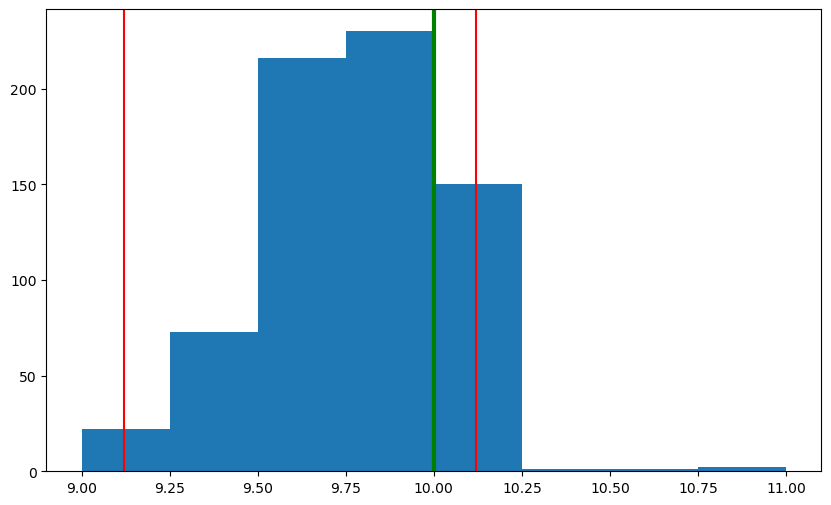

In [25]:

# Found size of bins and failed at plotting due to object vs float error -- bins need to be bin maxes 
# size_bins = list(np.arange(binmin, binmax + 1, 0.25))
# size_bins

l_limit =9.12
u_limit = 10.12
exact = 10

bins = np.floor(min_wt)
bin = [bins, bins +.25, bins +.5, bins +0.75,bins + 1, bins +1.25,bins + 1.5, bins + 1.75, bins + 2]

sir_8 = product['measured_weight']

plt.figure(figsize=(10,6))
plt.hist(sir_8,bins=bin)
plt.axvline(l_limit, color="red")
plt.axvline(u_limit, color="red")
plt.axvline(exact, color="green", linewidth= 3)

# histo_wt = pd.cut(sirloin_8_wt['external_measurement_weight'], bins= top_bin)
# histo_wt = pd.DataFrame(histo_wt)
# histo_wt

plt.show()

In [38]:
####NOTE + TO DO need to change tHE BIN LABELS AND BINS TO NUMBERS OR CAN'T CALL VERTICALS 

histo_grp = histo_wt.groupby('external_measurement_weight')['external_measurement_weight'].count()


histo_grp = pd.DataFrame(histo_grp)

histo_grp = histo_grp.rename(columns= {'external_measurement_weight' : 'count'})

histo_grp = histo_grp.reset_index()

histo_grp


C:\Users\19727\AppData\Local\Temp\ipykernel_10456\2601531283.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  histo_grp = histo_wt.groupby('external_measurement_weight')['external_measurement_weight'].count()


,external_measurement_weight,count
0,"(7.0, 7.25]",0
1,"(7.25, 7.5]",45
2,"(7.5, 7.75]",309
3,"(7.75, 8.0]",576
4,"(8.0, 8.25]",666
5,"(8.25, 8.5]",470
6,"(8.5, 8.75]",22


In [59]:
# plt.figure(figsize=(12, 6))

# bars = plt.bar(histo_grp['external_measurement_weight'],histo_grp['count'])

# plt.show()
# # Plotting the bar graph
# plt.figure(figsize=(12, 6))

# # Iterate over the rate of growth values to set the color accordingly
# colors = ['darkred' if rate > 0 else 'teal' for rate in df_2016['Rate_of_Growth']]

# # Plotting the bars with colors based on the rate of growth
# bars = plt.bar(df_2016['ParentLocationCode'], df_2016['Rate_of_Growth'], color=colors)

# plt.xlabel('Region', color='white')  # Set label color to white
# plt.ylabel('Rate of Growth (%)', color='white')  # Set label color to white
# plt.title('Rate of Consumption Growth for Each Region (2016)', color='white')  # Set title color to white
# plt.xticks(color='white')  # Set tick color to white
# plt.yticks(color='white')  # Set tick color to white
# plt.grid(axis='y', linestyle='--', alpha=0.6, color='white')  # Set grid line color to white

# # Set color of all lines to white
# plt.gca().spines['top'].set_color('white')
# plt.gca().spines['bottom'].set_color('white')
# plt.gca().spines['left'].set_color('white')
# plt.gca().spines['right'].set_color('white')

# # Set background color to transparent
# plt.gca().set_facecolor('none')

# # Save the figure as a PNG with a transparent background
# plt.savefig('bar_chart.png', transparent=True)

# plt.show()

In [111]:
df2['product']

0             10 oz  Sirloin A
1             11 oz  Sirloin B
2             11 oz  Sirloin C
3         13 oz  Ribeye Tail A
4               16 oz  Strip A
5      16 oz  Dry Age Ribeye A
6         16 oz  Prime Strip A
7         16 oz  Ribeye Tail A
8              18 oz  Ribeye A
9        20 oz  Prime Ribeye A
10        22 oz  Porterhouse A
11        3.5 oz Tender Bits A
12    4 oz T Tenderloin Tail A
13            5 oz S Sirloin A
14            5 oz S Sirloin B
15            6 oz S Sirloin A
16            6 oz S Sirloin B
17         6 oz T Tenderloin A
18            7 oz S Sirloin A
19            7 oz S Sirloin B
20         7 oz T Tenderloin A
21          8 oz P Pork Chop A
22            8 oz S Sirloin A
23            8 oz S Sirloin B
24         8 oz T Tenderloin A
25            9 oz S Sirloin A
26         9 oz T Tenderloin A
Name: product, dtype: object

In [109]:
df2.head(2)

,product,weight_min,weight_max,thick_min,thick_max
0,10 oz Sirloin A,9.12,10.12,1.1,1.75
1,11 oz Sirloin B,10.08,11.08,1.1,1.75


In [117]:
condition = df2['product']=='10 oz  Sirloin A'


In [118]:
result = df2.loc[condition,'thick_max']

In [119]:
result

Series([], Name: thick_max, dtype: float64)